# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress, pearsonr
import scipy.stats as st 
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results, mouse_metadata, on=['Mouse ID'], how='left')


# Display the data table for preview
combine_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_ID = combine_data['Mouse ID'].unique()
total_mice = len(unique_ID)
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint_data = combine_data.groupby(['Mouse ID', 'Timepoint'])
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dp_mice = combine_data.loc[combine_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dp_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate entries based on 'Mouse ID' and 'Timepoint'

duplicate_mouse_ids = combine_data[combine_data['Mouse ID'].isin(dp_mice)]

duplicate_mouse_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combine_data.drop_duplicates(subset='Mouse ID', keep='first')
clean_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_df['Mouse ID'].unique()
clean_total_mice= len(clean_total_mice)
clean_total_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean_tumor_df = combine_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_tumor_df= combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_df = combine_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
st_tumor_df= combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_errors_df = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({ "Mean Tumor Volume" : mean_tumor_df,
                                     "Median Tumor Volume" : median_tumor_df,
                                     "Tumor Volume Variance" : var_tumor_df,
                                     "Tumor Volume Std. Dev" : st_tumor_df,
                                     "Tumor Volume Std. Err": standard_errors_df
                                     })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
second_summary= combine_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
second_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

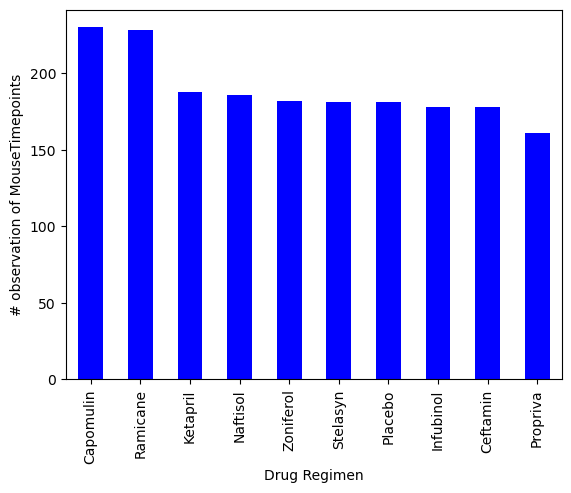

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
per_regimen = combine_data['Drug Regimen'].value_counts()
per_regimen.plot(kind='bar', align='center', alpha= 1, color='b')
plt.ylabel('# observation of MouseTimepoints')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

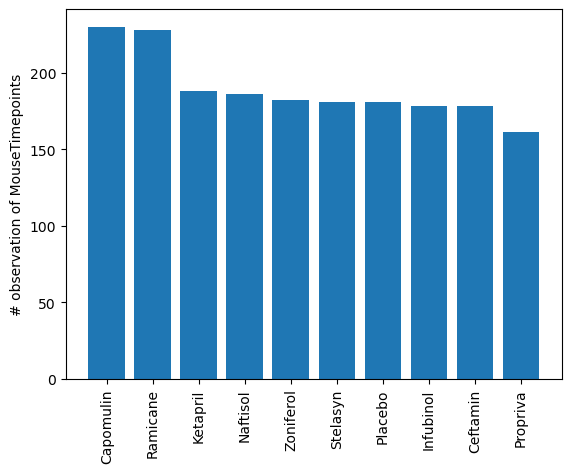

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = per_regimen.index
y_axis = per_regimen.values
plt.bar(x_axis, y_axis, align='center', alpha=1)
plt.xticks(rotation=90)
plt.ylabel('# observation of MouseTimepoints')
plt.show

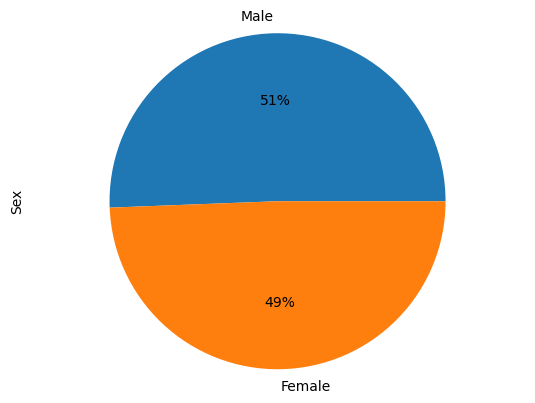

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_panda_bar = combine_data['Sex'].value_counts()
per_panda_bar.plot(kind='pie', autopct='%1.0f%%')
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

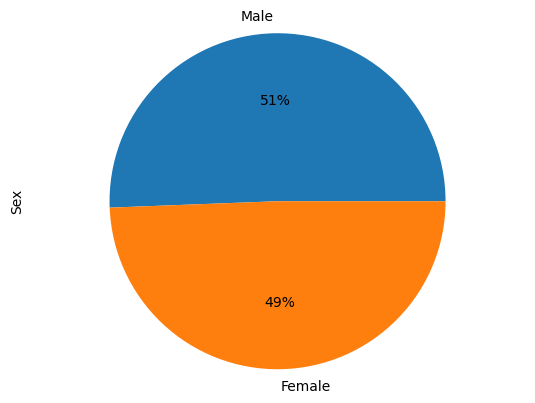

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = combine_data['Sex'].value_counts()
labels= ['Male', 'Female']
plt.pie(x_axis, autopct='%1.0f%%', labels=labels)
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#created a variable for the specific treatments 
treatment_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#retrieve the specific treatments
treatment_reg_filter = combine_data[combine_data['Drug Regimen'].isin(treatment_reg)]
#now find the last timepoint to get the final tumor volume
last_timepoint= treatment_reg_filter.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume_df = pd.merge(last_timepoint, combine_data, on=['Mouse ID', 'Timepoint'], how='left')



In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Assuming 'combined_df' is your DataFrame
# List of treatments to analyze
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data
tumor_vol_list = []

# Filter combined_df for the specified treatments
filtered_df = combine_data[combine_data['Drug Regimen'].isin(treatment_list)]

# Group by 'Mouse ID' and find the last timepoint for each
last_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append these volumes to the list
    tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


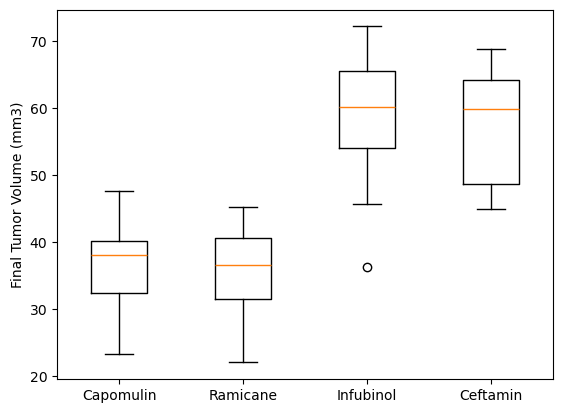

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 =plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels=treatment_list)
plt.savefig("Images/boxplot.png")

plt.show()

## Line and Scatter Plots

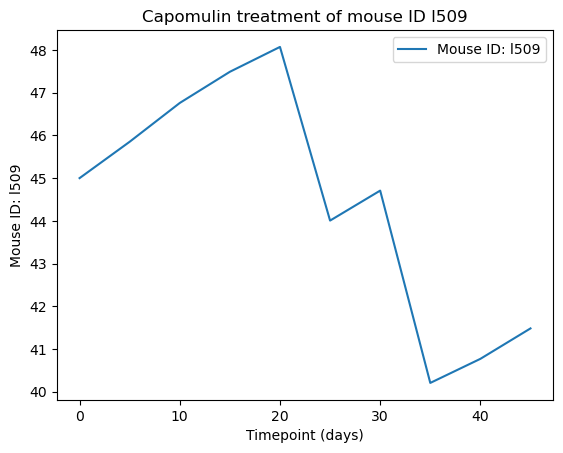

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']
single_mouse = cap_data[cap_data['Mouse ID'] == 'l509']

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])


plt.title('Capomulin treatment of mouse ID l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Mouse ID: l509')
plt.legend(['Mouse ID: l509'])
plt.show()

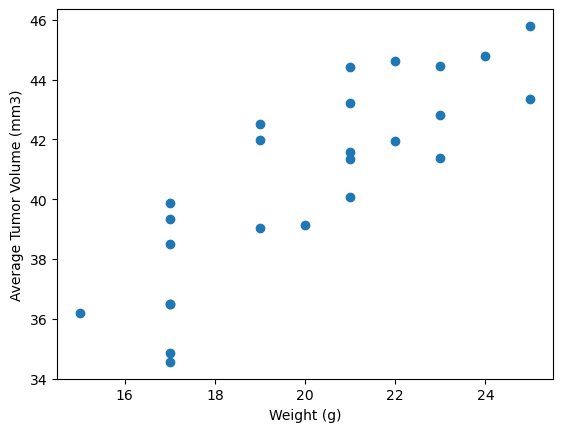

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_df = combine_data[combine_data['Drug Regimen'] == 'Capomulin']


av_tumor_vol = drug_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})




plt.scatter(av_tumor_vol['Weight (g)'], av_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("Images/scatter.png")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


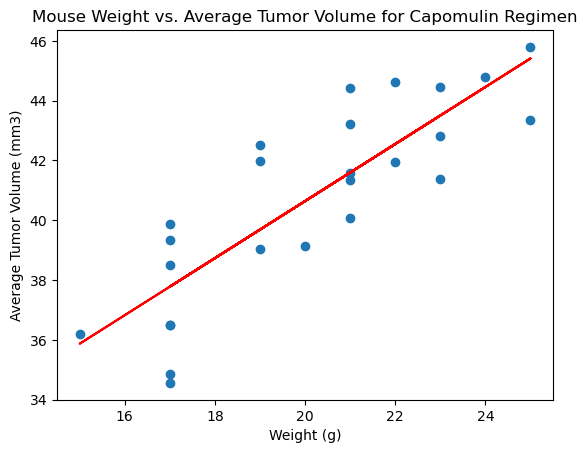

The r-squared is: 0.71


<Figure size 640x480 with 0 Axes>

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(av_tumor_vol['Weight (g)'], av_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(av_tumor_vol['Weight (g)'], av_tumor_vol['Tumor Volume (mm3)'])

# Calculate the regression values
regression_values = av_tumor_vol['Weight (g)'] * slope + intercept

# Create a scatter plot of the data
plt.scatter(av_tumor_vol['Weight (g)'], av_tumor_vol['Tumor Volume (mm3)'])

# Plot the linear regression line
plt.plot(av_tumor_vol['Weight (g)'], regression_values, "r-")

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.savefig("Images/cor_coef_reg.png")

# Print the r-squared value
print(f"The r-squared is: {r_value**2:.2f}")

